In [1]:

import pandas as pd
import numpy as np
import re
import string
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings

warnings.filterwarnings('ignore')
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

True

In [2]:
# Load the dataset
data= pd.read_csv('../datasets/toxicity.csv')


In [3]:
# Data Analysis
print("Dataset shape:", data.shape)
print("\nClass distribution:")
print(data['Toxicity'].value_counts())
print("\nClass distribution percentage:")
print(data['Toxicity'].value_counts(normalize=True) * 100)

Dataset shape: (56745, 3)

Class distribution:
0    32592
1    24153
Name: Toxicity, dtype: int64

Class distribution percentage:
0    57.435897
1    42.564103
Name: Toxicity, dtype: float64


In [4]:
# Check for missing values
print("\nMissing values:", data.isnull().sum().sum())



Missing values: 0


In [5]:
# Sample tweets by class
print("\nSample non-toxic tweet:")
print(data[data['Toxicity'] == 0]['tweet'].iloc[0])
print("\nSample toxic tweet:")
print(data[data['Toxicity'] == 1]['tweet'].iloc[0])


Sample non-toxic tweet:
 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run

Sample toxic tweet:
@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  


In [6]:
# Basic text statistics
data['tweet_length'] = data['tweet'].apply(len)
data['word_count'] = data['tweet'].apply(lambda x: len(x.split()))


In [7]:
print("\nText length statistics:")
print(data.groupby('Toxicity')['tweet_length'].describe())
print("\nWord count statistics:")
print(data.groupby('Toxicity')['word_count'].describe())


Text length statistics:
            count       mean        std  min   25%   50%    75%    max
Toxicity                                                              
0         32592.0  85.347815  30.901378  7.0  62.0  88.0  108.0  522.0
1         24153.0  84.633544  40.384385  5.0  52.0  82.0  115.0  754.0

Word count statistics:
            count       mean       std  min  25%   50%   75%   max
Toxicity                                                          
0         32592.0  13.263163  5.655622  1.0  9.0  13.0  17.0  52.0
1         24153.0  14.001076  6.676217  1.0  9.0  13.0  19.0  36.0


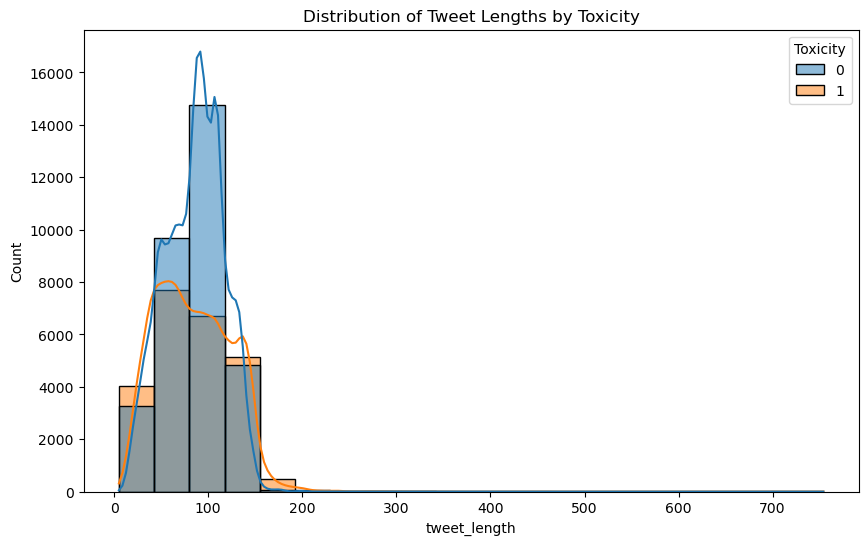

In [8]:
# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tweet_length', hue='Toxicity', bins=20, kde=True)
plt.title('Distribution of Tweet Lengths by Toxicity')
plt.show('tweet_length_distribution.png')
plt.close()

Loading and exploring the dataset...
Dataset loaded with 56745 rows
Columns: ['Unnamed: 0', 'Toxicity', 'tweet']

Class distribution:
0    32592
1    24153
Name: Toxicity, dtype: int64

Class distribution percentage:
0    57.435897
1    42.564103
Name: Toxicity, dtype: float64

Analyzing data and features...


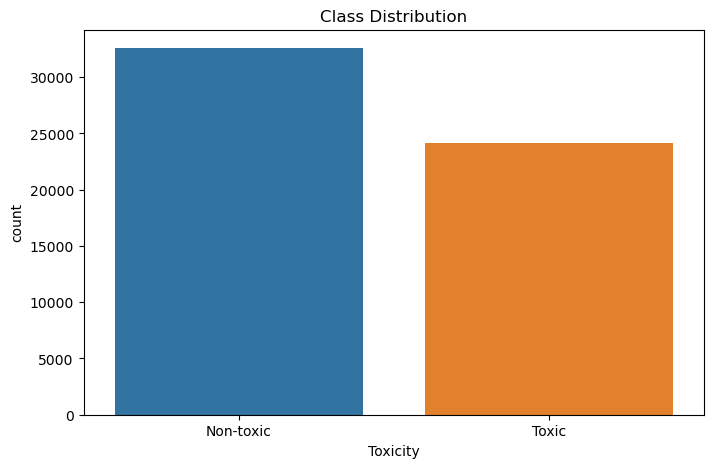

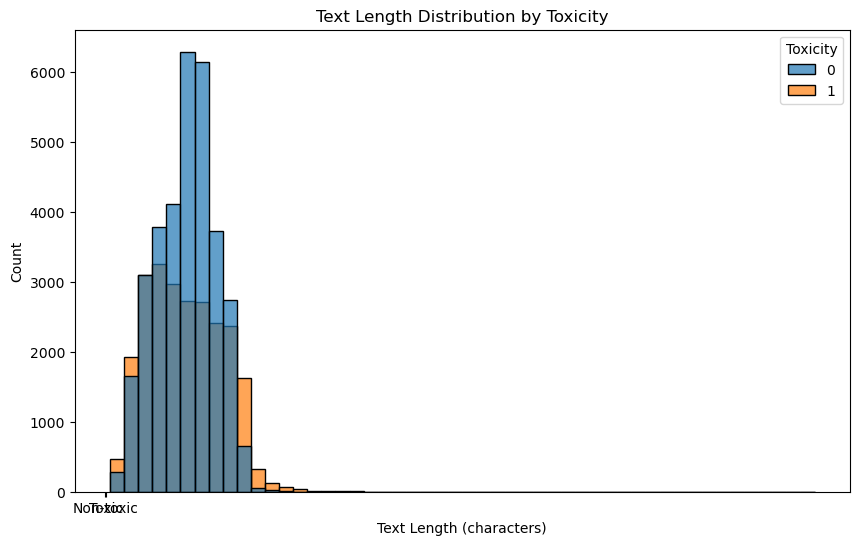

WordCloud not installed. Skipping word cloud visualization.

Analyzing toxic categories in the dataset...


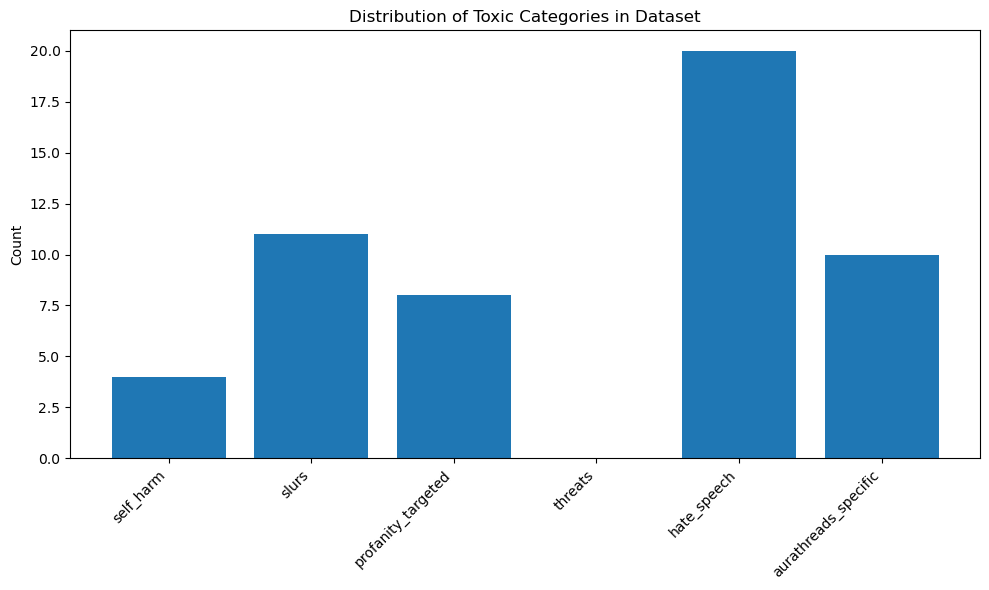


Splitting data into train and test sets...
Training set size: 45396
Testing set size: 11349

Training logistic regression model...
Training logistic_regression model on 45396 documents...

Evaluating logistic regression model...

Evaluation Metrics for toxicity model:
Accuracy: 0.9331
F1 Score: 0.9181
ROC-AUC: 0.9729

Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.92      0.97      0.94      6518
       Toxic       0.96      0.88      0.92      4831

    accuracy                           0.93     11349
   macro avg       0.94      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



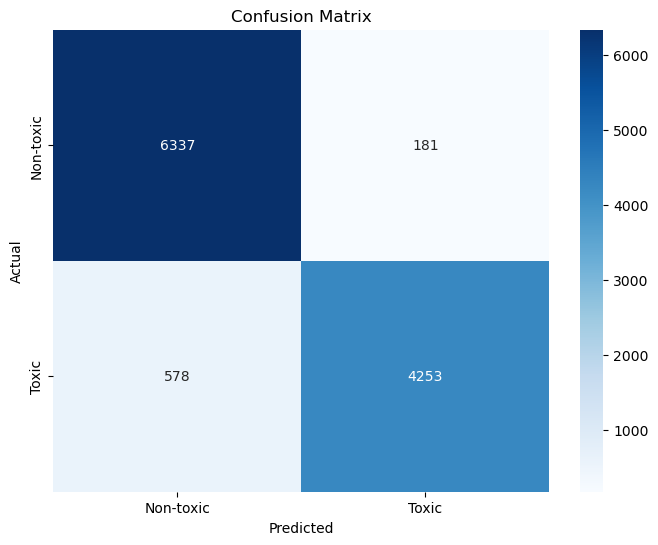


Sample Predictions:

Text: RT @RabehChararah1: Wack ass hoes
Actual: Toxic
Prediction: Toxic

Text: hold the door..... 
Actual: Non-toxic
Prediction: Non-toxic

Text: went to do my sister's make-up and i can't find my sample of @user lipstick i got d:   i was looking forward to using it!
Actual: Non-toxic
Prediction: Non-toxic

Text: RT @Cashbethemotive: @HaveMercyyy @killquana ooh yea @gucci1017 !! Getting all hoes!
Actual: Toxic
Prediction: Toxic

Text: no more   poses anymore - loving barry rnâ¤ï¸ @user @user 
Actual: Non-toxic
Prediction: Non-toxic

Comparing different models to find the best...

=== Training logistic_regression model ===
Training logistic_regression model on 45396 documents...

Evaluation Metrics for logistic_regression:
Accuracy: 0.9331
F1 Score: 0.9181
ROC-AUC: 0.9729

Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.92      0.97      0.94      6518
       Toxic       0.96      0.88      0.92      4831

    ac

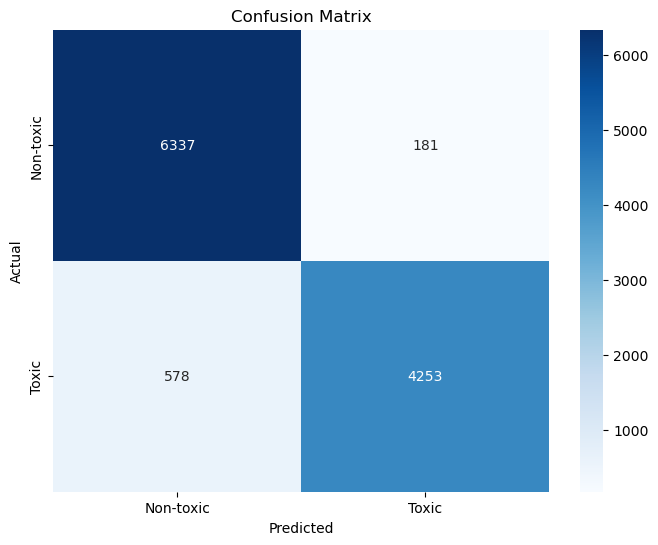


Sample Predictions:

Text:   #fathersday to all #fathers who are #dad to there #children and #husband to their #wife...
Actual: Non-toxic
Prediction: Non-toxic

Text: this makes me smile.   #thursdaythoughts 
Actual: Non-toxic
Prediction: Non-toxic

Text: life only comes around once, so do whatever makes you happy and be with whoever makes you smile.  #entrepreneur #life   #smile #dream
Actual: Non-toxic
Prediction: Non-toxic

Text: you're the pulse that i've always needed. â¤  #ilovevyka #myalways  #10 #mygirl #inlove  â¦ 
Actual: Non-toxic
Prediction: Non-toxic

Text:  @user i guess his friends are more impoant than his girlfriend.   ð
Actual: Non-toxic
Prediction: Non-toxic

=== Training linear_svm model ===
Training linear_svm model on 45396 documents...

Evaluation Metrics for linear_svm:
Accuracy: 0.8855
F1 Score: 0.8517
ROC-AUC: 0.9635

Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.85      0.97      0.91      6518
      

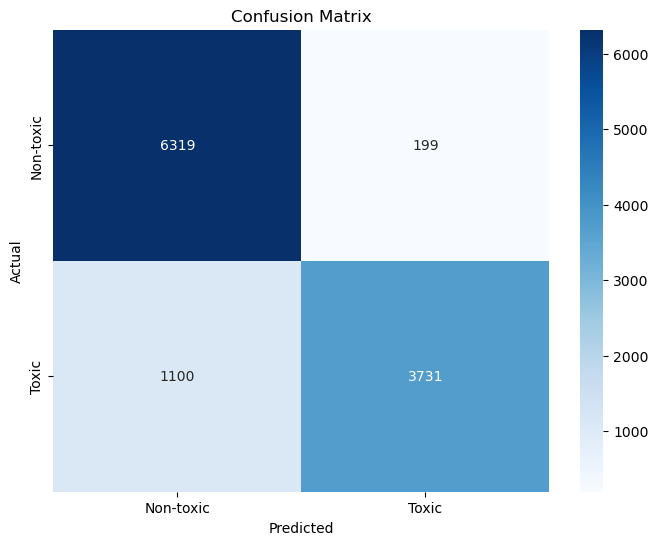


Sample Predictions:

Text: @user #allahsoil thereâs no such thing as an average christian, or muslim, or jew.  â¦  â¦ 
Actual: Toxic
Prediction: Non-toxic

Text:  @user today is a perfect day to be  ! #happiness #lifecoach #reinventimpossible 
Actual: Non-toxic
Prediction: Non-toxic

Text: only if there was two msgrenaway #education #makemoney #cash #lifestyle #happy   #motivationâ¦ 
Actual: Non-toxic
Prediction: Toxic

Text: franklin is a   #dog in the #sunshine #dogsoftwitter 
Actual: Non-toxic
Prediction: Non-toxic

Text: me the g and our manager relaxing before work :)   #summeime #gÃyy #bam #awesomeâ¦ 
Actual: Non-toxic
Prediction: Non-toxic

=== Training random_forest model ===
Training random_forest model on 45396 documents...

Evaluation Metrics for random_forest:
Accuracy: 0.9298
F1 Score: 0.9130
ROC-AUC: 0.9711

Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.91      0.98      0.94      6518
       Toxic       0.97   

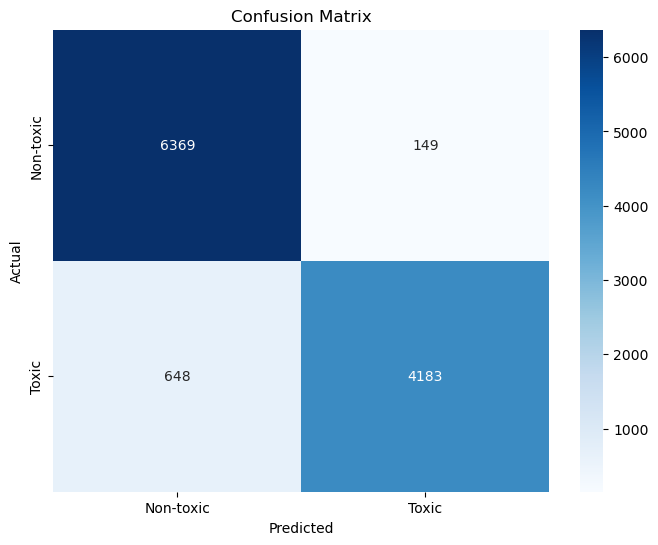


Sample Predictions:

Text: @felicity182 a pussy in ur mouth is a really good stress reliever doctors recommend
Actual: Toxic
Prediction: Toxic

Text: RT @thecoreyholcomb: All these bitches somewhere coughing like a mug http://t.co/Pow2SHkwIz
Actual: Toxic
Prediction: Toxic

Text: RT @JaredPhillis: All you do is fucking bitch.
Actual: Toxic
Prediction: Toxic

Text: had a brilliant night with great friends thank you to my amazing mum @user for babysitting now off to the safari park x#yolo  
Actual: Non-toxic
Prediction: Non-toxic

Text: exactly my thoughts.    teens poems ness quotes #hu #alone #lostâ¦ 
Actual: Non-toxic
Prediction: Non-toxic

=== Best model: logistic_regression ===
F1 Score: 0.9181
Accuracy: 0.9331
ROC-AUC: 0.9729
Model saved to 'aurathreads_toxicity_detector.pkl'

Example: Detecting toxicity in text samples


In [2]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings

warnings.filterwarnings('ignore')
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

# Define toxic phrases patterns
ENHANCED_TOXIC_PHRASES = {
    'self_harm': [
        r'\b(kill|k[!1i]ll|k\*+ll)\s*(your|ur|yr)\s*(self|s3lf|s[e3]lf|yourself)',
        r'\b(go|just|why\s+don\'*t\s+you)\s+(die|end\s+your\s+life|hang\s+yourself)',
        r'\bkys\b',
        r'\b(commit|attempt)\s+suicide',
        r'\bjump\s+(off|from)\s+a\s+(bridge|building|cliff)',
        r'\bno\s+one\s+would\s+(miss|care\s+about)\s+you',
        r'\bk\W*y\W*s\b',
        r'\bd[i1!]\W*[e3]\b',
        r'\bs[u\*][i1!]\W*c[i1!]d[e3]\b',
    ],
    'slurs': [
        r'\b(n[i!1]gg[ae3]r|n[i!1]gg[a3]|n[i!1]gg)',
        r'\bf[a@]gg[o0]t|\bf[a@]g\b',
        r'\br[e3]t[a@]rd[e3]d|\br[e3]t[a@]rd',
        r'\bd[y!1]ke',
        r'\btr[a@]nny',
        r'\bspan[i!1]c',
        r'\bc[o0]l[o0]r[e3]d',
        r'\bch[i!1]nk',
        r'\bk[i!1]k[e3]',
        r'\bwh[o0]r[e3]',
        r'\bcunt',
        r'\bc\W*u\W*n\W*t\b',
        r'\bwh[o0]\W*r\W*[e3]\b',
        r'\bf\W*a\W*g\W*([g]\W*[o0]\W*t)?\b',
        r'\bn\W*[i!1]\W*g\W*g\W*[ae3]?\W*r?\b',
        r'\br\W*[e3]\W*t\W*[a@]\W*r\W*d\b',
    ],
    'profanity_targeted': [
        r'\b(fuck|screw|damn)\s+you',
        r'\byou\'*re?\s+(stupid|an\s+idiot|dumb|worthless|pathetic)',
        r'\bi\s+(hate|despise|loathe)\s+you',
        r'\byou\s+(suck|are\s+trash|should\s+die)',
        r'\bnoone\s+(likes|cares\s+about)\s+you',
        r'\byou\s+(deserve|need|should\s+get)\s+(cancer|aids|covid)',
        r'\bf\W*[u\*]\W*c\W*k\s+you\b',
        r'\bf\W{0,2}k\s+you\b',
        r'\bf\W{0,2}u\W{0,2}k\s+you\b',
        r'\bf\W{0,2}ck\s+you\b',
        r'\bf\W{0,2}c\W{0,2}k\s+you\b',
        r'\bf+\s*u+\s*c*\s*k+\s+y+\s*o*\s*u+\b',
        r'\bf\S*k\s+you\b',
        r'\bf\S*\s+you\b',
        r'\bi\s+h\W*[a@]\W*t\W*[e3]\s+you\b',
    ],
    'threats': [
        r'\bi\'*ll?\s+(beat|kill|hunt|find|murder)\s+you',
        r'\bi\'*m\s+going\s+to\s+(beat|kill|hunt|find|murder)\s+you',
        r'\bi\s+(will|would|wanna|want\s+to)\s+(beat|kill|hunt|find|murder)\s+you',
        r'\byou\s+(will|are\s+going\s+to|gonna|should)\s+(die|bleed|suffer)',
        r'\bi\'*ll?\s+find\s+(where|your|ur)\s+(you\s+live|house|family|address)',
        r'\bi\s+w\W*[i!1]\W*l\W*l\s+k\W*[i!1]\W*l\W*l\s+you\b',
        r'\bi\s+w\W*[i!1]\W*l\W*l\s+f\W*[i!1]\W*n\W*d\s+you\b',
    ],
    'hate_speech': [
        r'\b(all|you|those)\s+(should|must|need\s+to|ought\s+to)\s+(die|burn|suffer|perish)',
        r'\b(ethnic\s+cleansing|final\s+solution|white\s+power|white\s+supremacy)',
        r'\b(black\s+people|jews|muslims|gays|immigrants)\s+(are|should)\s+(exterminated|eliminated|wiped\s+out)',
        r'\b(death\s+to|kill\s+all|exterminate)\s+(the\s+)?(jews|muslims|blacks|gays|immigrants)',
        r'\b(racial\s+purity|racial\s+superiority|master\s+race)',
        r'\b(we\s+must|we\s+should)\s+(eliminate|exterminate|get\s+rid\s+of)\s+(them|those\s+people)',
        r'\b(you\s+(people|folks|fucks)\s+should\s+be\s+(wiped\s+out|eliminated))',
        r'\b((all|every)\s+(black\s+people|jews|muslims|gays)\s+are\s+(vermin|scum|subhuman))',
        r'\b((the\s+world|we)\s+would\s+be\s+better\s+off\s+without\s+(blacks|jews|muslims|gays))',
        r'\b(kkk|ku\s*klux\s*klan|nazi|nazis|heil\s+hilter|1488|14\s*words)',
        r'\b(swastika|white\s+pride|aryan\s+nation|blood\s+and\s+honor)',
        r'\b(d\W*e\W*a\W*t\W*h\s+t\W*o\s+t\W*h\W*e\s+j\W*e\W*w\W*s)',
        r'\b(k\W*i\W*l\W*l\s+a\W*l\W*l\s+m\W*u\W*s\W*l\W*i\W*m\W*s)',
        r'\b(w\W*h\W*i\W*t\W*e\s+s\W*u\W*p\W*r\W*e\W*m\W*a\W*c\W*y)',
        r'\b(e\W*x\W*t\W*e\W*r\W*m\W*i\W*n\W*a\W*t\W*e\s+t\W*h\W*e\s+j\W*e\W*w\W*s)',
        r'\b((they|those\s+people)\s+are\s+(vermin|rats|cockroaches|animals|subhuman))',
        r'\b((blacks|jews|muslims)\s+(don\'t|do\s+not)\s+deserve\s+to\s+live)',
        r'\b((exterminate|eliminate)\s+(the\s+)?(jewish|muslim|black)\s+(problem|threat|menace))',
        r'\b(gas\s+the\s+jews|oven\s+the\s+jews|burn\s+the\s+jews)',
        r'\b(lynch\s+(all|the)\s+blacks|hang\s+(all|the)\s+blacks)',
        r'\b(throw\s+(all|the)\s+muslims\s+off\s+cliffs|drown\s+(all|the)\s+muslims)',
        r'\b(round\s+up\s+the\s+(jews|muslims|gays)\s+and\s+(kill|execute|exterminate)\s+them)'
    ]
}

# Add AuraThreads-specific toxic patterns
AURATHREADS_TOXIC_PATTERNS = [
    r'#toxic',
    r'#killingbay',
    r'#seashepherd',
    r'repost if you agree',
]

# Add these to the existing patterns
ENHANCED_TOXIC_PHRASES['aurathreads_specific'] = AURATHREADS_TOXIC_PATTERNS

# Flatten the toxic phrases dictionary
def flatten_toxic_phrases(toxic_phrases_dict):
    """Flatten the toxic phrases dictionary"""
    flattened = []
    for category, patterns in toxic_phrases_dict.items():
        for pattern in patterns:
            flattened.append((pattern, category))
    return flattened

ALL_TOXIC_PHRASES = flatten_toxic_phrases(ENHANCED_TOXIC_PHRASES)

# Text preprocessing functions
def clean_text(text):
    """AuraThreads-specific text cleaning"""
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove AuraThreads-specific elements
    text = re.sub(r'@user', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    
    # Remove emojis and special characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Keep alphanumeric and basic punctuation
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def process_text(text, remove_stopwords=True, lemmatize=True):
    """Full text preprocessing pipeline"""
    text = clean_text(text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords if needed
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [t for t in tokens if t not in stop_words]
    
    # Lemmatize if needed
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    # Join back to string
    return " ".join(tokens)

# Toxicity detection functions
def count_toxic_phrases(text, toxic_phrases=ENHANCED_TOXIC_PHRASES):
    """Count toxic phrases by category in a text"""
    if not isinstance(text, str):
        return {'total': 0, 'self_harm': 0, 'slurs': 0, 'profanity_targeted': 0, 
               'threats': 0, 'hate_speech': 0, 'aurathreads_specific': 0}
    
    text = text.lower()
    counts = {
        'total': 0,
        'self_harm': 0,
        'slurs': 0,
        'profanity_targeted': 0,
        'threats': 0, 
        'hate_speech': 0,
        'aurathreads_specific': 0
    }
    
    # Check each category's patterns
    for category, patterns in toxic_phrases.items():
        for pattern in patterns:
            if re.search(pattern, text, re.IGNORECASE):
                counts[category] += 1
                counts['total'] += 1
    
    return counts

def detect_toxic_phrases(text, all_toxic_phrases=ALL_TOXIC_PHRASES):
    """Detect specific toxic phrases in a text"""
    if not isinstance(text, str):
        return []
    
    text = text.lower()
    detected = []
    
    for pattern, category in all_toxic_phrases:
        matches = re.finditer(pattern, text, re.IGNORECASE)
        for match in matches:
            detected.append((match.group(), category))
    
    return detected

def get_dict_score(text):
    """Get dictionary-based toxicity score (0-1)"""
    counts = count_toxic_phrases(text)
    
    # Score based on presence of toxic phrases
    if counts['self_harm'] > 0 or counts['threats'] > 0 or counts['hate_speech'] > 0:
        return 1.0
    if counts['slurs'] > 0:
        return 1.0
    if counts['profanity_targeted'] >= 1:
        return 1.0
    if counts['aurathreads_specific'] >= 1:
        return 0.7
    if counts['total'] >= 2:
        return 1.0
    
    # Check for obfuscated profanity
    if isinstance(text, str):
        obfuscation_chars = len(re.findall(r'[\*\-\.#@!$%^&]', text))
        has_profanity_pattern = any([
            re.search(r'f\W*(?:\S*\W*)?(?:u|\*)\W*(?:\S*\W*)?c*\W*(?:\S*\W*)?k', text.lower()),
            re.search(r'sh\W*(?:\S*\W*)?i\W*(?:\S*\W*)?t', text.lower()),
        ])
        
        if obfuscation_chars >= 2 and has_profanity_pattern:
            return 1.0
    
    return 0.0

# Model creation and training functions
def create_model(model_type='logistic_regression'):
    """Create ML model with text processing"""
    if model_type == 'logistic_regression':
        classifier = LogisticRegression(random_state=42, max_iter=1000, C=5, class_weight='balanced')
    elif model_type == 'linear_svm':
        classifier = LinearSVC(random_state=42, max_iter=10000, C=1, dual=False, class_weight='balanced')
    elif model_type == 'random_forest':
        classifier = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
    
    return Pipeline([
        ('vectorizer', TfidfVectorizer(
            max_features=10000,
            ngram_range=(1, 3),
            min_df=3,
            max_df=0.9
        )),
        ('classifier', classifier)
    ])

def validate_data(X, y):
    """Ensure data meets minimum requirements"""
    if len(X) < 2:
        raise ValueError(f"Need at least 2 documents, got {len(X)}")
    
    # Ensure X and y are both numpy arrays or lists
    X = list(X)
    y = list(y)
    
    # Remove empty strings
    valid_indices = [i for i, text in enumerate(X) if isinstance(text, str) and text.strip()]
    X_valid = [X[i] for i in valid_indices]
    y_valid = [y[i] for i in valid_indices]
    
    if len(X_valid) < len(X):
        print(f"Warning: Removed {len(X) - len(X_valid)} empty documents")
    
    return X_valid, y_valid

def train_model(X, y, model_type='logistic_regression', preprocess=True):
    """Train a toxicity detection model"""
    # Validate and clean data
    X_valid, y_valid = validate_data(X, y)
    
    # Preprocess if needed
    if preprocess:
        X_valid = [process_text(text) for text in X_valid]
    
    # Create and train the model
    model = create_model(model_type)
    print(f"Training {model_type} model on {len(X_valid)} documents...")
    model.fit(X_valid, y_valid)
    
    return model

def predict_proba(model, X, preprocess=True):
    """Get prediction probabilities with dictionary enhancement"""
    if isinstance(X, str):
        X = [X]
    
    # Preprocess if needed
    if preprocess:
        X_processed = [process_text(text) for text in X]
    else:
        X_processed = X
    
    # Get base model probabilities
    if hasattr(model, 'predict_proba'):
        base_probs = model.predict_proba(X_processed)[:, 1]
    else:  # For LinearSVC which doesn't have predict_proba
        decision = model.decision_function(X_processed)
        base_probs = 1 / (1 + np.exp(-decision))
    
    # Get dictionary-based adjustments
    dict_scores = np.array([get_dict_score(text) for text in X])
    
    # Combine with weighting (70% model, 30% dictionary)
    combined_probs = 0.7 * base_probs + 0.3 * dict_scores
    
    return np.vstack([1 - combined_probs, combined_probs]).T

def predict_toxicity(model, X, threshold=0.5, preprocess=True):
    """Predict toxicity labels"""
    probs = predict_proba(model, X, preprocess)
    return (probs[:, 1] > threshold).astype(int)

def evaluate_model(model, X, y, verbose=True, preprocess=True, model_type="toxicity model"):
    """Evaluate model performance with detailed metrics"""
    # Convert pandas Series to list if necessary
    X_list = X.tolist() if hasattr(X, 'tolist') else X
    y_list = y.tolist() if hasattr(y, 'tolist') else y
    
    preds = predict_toxicity(model, X_list, preprocess=preprocess)
    acc = accuracy_score(y_list, preds)
    f1 = f1_score(y_list, preds)
    
    if len(np.unique(y_list)) == 2:  # Binary classification
        probs = predict_proba(model, X_list, preprocess)
        roc_auc = roc_auc_score(y_list, probs[:, 1])
    else:
        roc_auc = None
    
    if verbose:
        print(f"\nEvaluation Metrics for {model_type}:")
        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        if roc_auc:
            print(f"ROC-AUC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_list, preds, target_names=['Non-toxic', 'Toxic']))
        
        # Create confusion matrix
        cm = confusion_matrix(y_list, preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Non-toxic', 'Toxic'], 
                    yticklabels=['Non-toxic', 'Toxic'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        
        # Show some examples of predictions with fixed indexing
        print("\nSample Predictions:")
        num_samples = min(5, len(X_list))
        indices = np.random.choice(len(X_list), num_samples, replace=False)
        
        for i in indices:
            text = X_list[i]
            print(f"\nText: {text}")
            print(f"Actual: {'Toxic' if y_list[i] else 'Non-toxic'}")
            print(f"Prediction: {'Toxic' if preds[i] else 'Non-toxic'}")
            toxic_phrases = detect_toxic_phrases(text)
            if toxic_phrases:
                print("Detected toxic phrases:")
                for phrase, category in toxic_phrases:
                    print(f"- '{phrase}' ({category})")
    
    return {'accuracy': acc, 'f1_score': f1, 'roc_auc': roc_auc}

def compare_models(X_train, y_train, X_test, y_test, preprocess=True):
    """Compare different models and return the best one"""
    model_types = ['logistic_regression', 'linear_svm', 'random_forest']
    results = {}
    trained_models = {}
    
    for model_type in model_types:
        print(f"\n=== Training {model_type} model ===")
        model = train_model(X_train, y_train, model_type=model_type, preprocess=preprocess)
        trained_models[model_type] = model
        
        metrics = evaluate_model(model, X_test, y_test, preprocess=preprocess, model_type=model_type)
        results[model_type] = metrics
    
    # Find best model based on F1 score
    best_model_type = max(results, key=lambda k: results[k]['f1_score'])
    print(f"\n=== Best model: {best_model_type} ===")
    print(f"F1 Score: {results[best_model_type]['f1_score']:.4f}")
    print(f"Accuracy: {results[best_model_type]['accuracy']:.4f}")
    if results[best_model_type]['roc_auc']:
        print(f"ROC-AUC: {results[best_model_type]['roc_auc']:.4f}")
    
    return trained_models[best_model_type], best_model_type

def analyze_data_and_features(data, text_col, label_col):
    """Analyze dataset and feature importance"""
    # Check for class imbalance
    plt.figure(figsize=(8, 5))
    sns.countplot(x=label_col, data=data)
    plt.title('Class Distribution')
    plt.xlabel('Toxicity')
    plt.xticks([0, 1], ['Non-toxic', 'Toxic'])
    plt.show()
    
    # Text length analysis
    data['text_length'] = data[text_col].astype(str).apply(len)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='text_length', hue=label_col, bins=50, alpha=0.7)
    plt.title('Text Length Distribution by Toxicity')
    plt.xlabel('Text Length (characters)')
    plt.xticks([0, 1], ['Non-toxic', 'Toxic'])
    plt.show()
    
    # Create word clouds for toxic vs non-toxic
    try:
        from wordcloud import WordCloud
        
        # Combine all non-toxic texts
        non_toxic_text = ' '.join(data[data[label_col] == 0][text_col].astype(str))
        
        # Combine all toxic texts
        toxic_text = ' '.join(data[data[label_col] == 1][text_col].astype(str))
        
        # Preprocess texts
        non_toxic_processed = process_text(non_toxic_text)
        toxic_processed = process_text(toxic_text)
        
        # Generate word clouds
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        wc_non_toxic = WordCloud(width=400, height=400, background_color='white', max_words=100).generate(non_toxic_processed)
        plt.imshow(wc_non_toxic, interpolation='bilinear')
        plt.axis('off')
        plt.title('Non-toxic Posts')
        
        plt.subplot(1, 2, 2)
        wc_toxic = WordCloud(width=400, height=400, background_color='white', max_words=100).generate(toxic_processed)
        plt.imshow(wc_toxic, interpolation='bilinear')
        plt.axis('off')
        plt.title('Toxic Posts')
        
        plt.tight_layout()
        plt.show()
    except ImportError:
        print("WordCloud not installed. Skipping word cloud visualization.")
    
    # Analyze toxic categories
    toxic_texts = data[data[label_col] == 1][text_col].tolist()
    
    print("\nAnalyzing toxic categories in the dataset...")
    categories = ['self_harm', 'slurs', 'profanity_targeted', 'threats', 'hate_speech', 'aurathreads_specific']
    category_counts = {cat: 0 for cat in categories}
    
    for text in toxic_texts[:1000]:  # Analyze a subset for efficiency
        counts = count_toxic_phrases(text)
        for cat in categories:
            if counts[cat] > 0:
                category_counts[cat] += 1
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.keys(), category_counts.values())
    plt.title('Distribution of Toxic Categories in Dataset')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return category_counts

# Function to save the trained model
def save_model(model, filename='aurathreads_toxicity_detector.pkl'):
    """Save the model to a file"""
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to '{filename}'")

# Function to load the trained model
def load_model(filename='aurathreads_toxicity_detector.pkl'):
    """Load a model from a file"""
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    print(f"Model loaded from '{filename}'")
    return model

# Example usage in a notebook (this code would be executed in notebook cells)

# 1. Load the dataset
print("Loading and exploring the dataset...")
data = pd.read_csv('../datasets/toxicity.csv')

# Set column names based on the dataset
text_col = 'tweet'
label_col = 'Toxicity'

# Print dataset info
print(f"Dataset loaded with {len(data)} rows")
print(f"Columns: {data.columns.tolist()}")
print(f"\nClass distribution:")
print(data[label_col].value_counts())
print(f"\nClass distribution percentage:")
print(data[label_col].value_counts(normalize=True) * 100)

# 2. Analyze dataset and visualize
print("\nAnalyzing data and features...")
category_counts = analyze_data_and_features(data, text_col, label_col)

# 3. Split data into train and test sets
print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    data[text_col], data[label_col], test_size=0.2, random_state=42, stratify=data[label_col]
)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# 4. Train a single model with optimized parameters
print("\nTraining logistic regression model...")
log_reg_model = train_model(X_train, y_train, model_type='logistic_regression', preprocess=True)

# 5. Evaluate the model
print("\nEvaluating logistic regression model...")
log_reg_results = evaluate_model(log_reg_model, X_test, y_test, verbose=True)

# 6. Compare different models to find the best one
print("\nComparing different models to find the best...")
best_model, best_model_type = compare_models(X_train, y_train, X_test, y_test)

# 7. Save the best model
save_model(best_model, 'aurathreads_toxicity_detector.pkl')

# 8. Example: How to use the model to predict toxicity
print("\nExample: Detecting toxicity in text samples")
sample_texts = [
    "This is a normal, non-toxic post.",
    "I love this product! It's really great.",
    "you're so stupid, I hate you so much",
    "Kill yourself, nobody would miss you",
    "#toxic This post contains a specific tag",
]

# Predict toxicity for samples
predictions = predict_toxicity(best_model, sample_texts)